Age: Age of employee  
Attrition: Employee attrition status  
Department: Department of work  
DistanceFromHome  
Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;  
Education Field  
EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;  
JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;  
MaritalStatus  
MonthlyIncome  
NumCompaniesWorked: Number of companies worked prior to IBM  
WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;  
YearsAtCompany: Current years of service in IBM  


Analysis Task:
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis
- Find the age distribution of employees in IBM
- Explore attrition by age
- Explore data for Left employees
- Find out the distribution of employees by the education field
- Give a bar chart for the number of married and unmarried employees
- Build up a logistic regression model to predict which employees are likely to attrite.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing attrition dataset

In [120]:
data_set = pd.read_csv("/home/kamalnath/Documents/CB_Tech/Machine Learning/data sets/IBM Attrition Data.csv")

## 

# Exploratory data analysis

In [121]:
data_set.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [122]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [123]:
data_set.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [124]:
## Exploratory data analysis

In [125]:
education = data_set.Education.value_counts()
education

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [126]:
education = data_set.Education.value_counts()
education_labels = {1: 'Below College', 2: 'College',3: 'Bachelors', 4: 'Masters', 5: 'Doctors'}

In [127]:
education.index.to_list()
education[1]

170

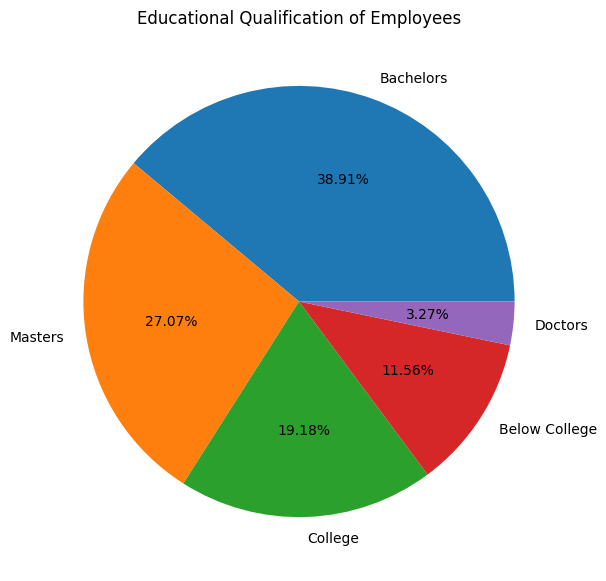

In [128]:
plt.figure(figsize = (7,7))
plt.title("Educational Qualification of Employees")
plt.pie(education, labels = [education_labels[index] for index in education.index.to_list()],autopct='%.2f%%')
plt.show()

In [129]:
job_satisfaction =data_set.JobSatisfaction.value_counts()
satisfaction_labels = {1: 'Low',2: 'Medium',3: 'High',4: 'Very High'}

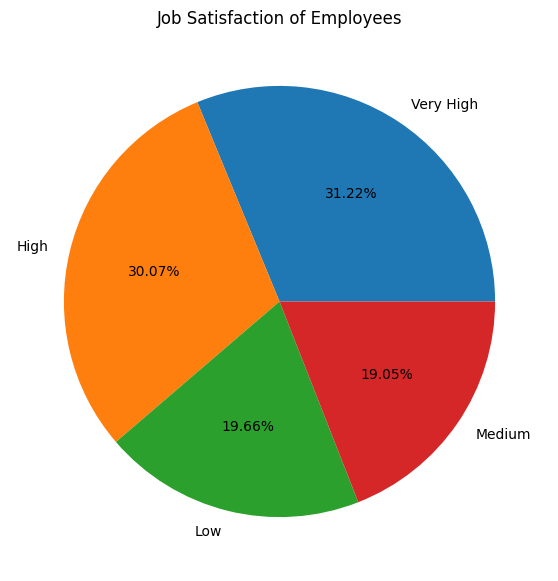

In [130]:

plt.figure(figsize = (7,7))
plt.title("Job Satisfaction of Employees")
plt.pie(job_satisfaction, labels = [satisfaction_labels[index] for index in job_satisfaction.index.to_list()],autopct='%.2f%%')
plt.show()

In [131]:
environment_satisfaction = data_set.EnvironmentSatisfaction.value_counts()

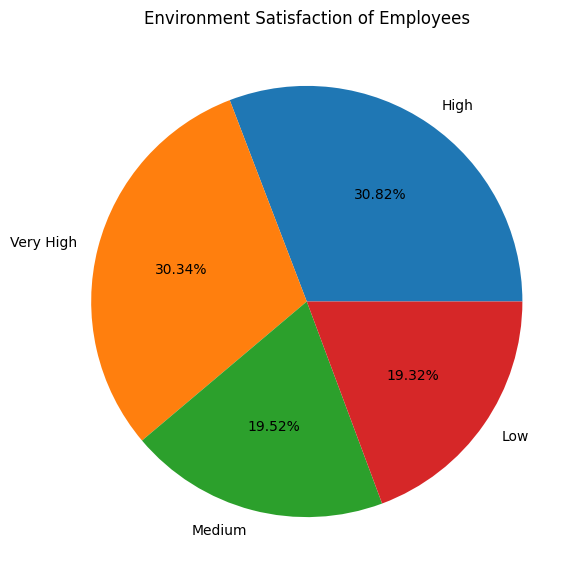

In [132]:
plt.figure(figsize = (7,7))
plt.title('Environment Satisfaction of Employees')
plt.pie(environment_satisfaction, labels = [satisfaction_labels[index] for index in environment_satisfaction.index.tolist()],autopct= '%.2f%%')
plt.show()

## Finding age distribution of employees

In [133]:
ages_count = data_set['Age'].value_counts()

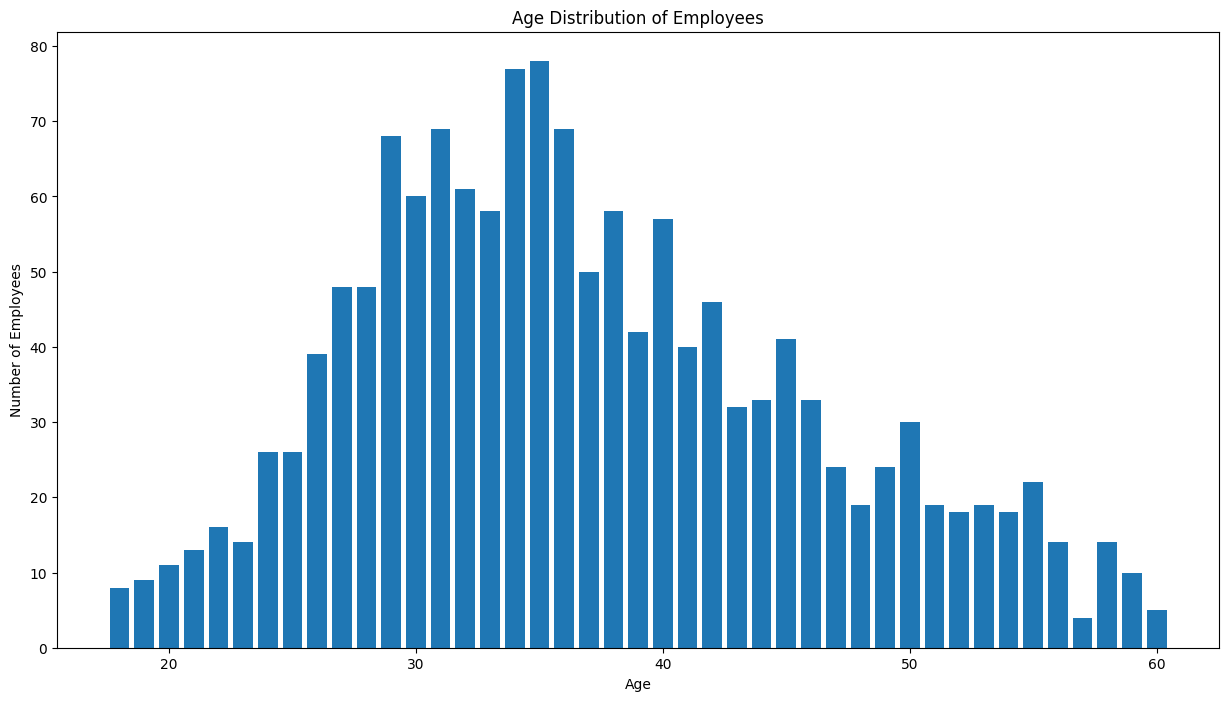

In [134]:
plt.figure(figsize= (15,8))
plt.title("Age Distribution of Employees")
plt.bar(ages_count.index,ages_count)
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

## Finding attrition by age 

In [135]:
data_set["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [136]:
attrition_yes = data_set[data_set["Attrition"] == "Yes"]
attrition_no = data_set[data_set["Attrition"] == "No"]

In [137]:
attrition_yes_by_age = attrition_yes['Age'].value_counts()
attrition_no_by_age = attrition_no['Age'].value_counts()

In [138]:
attrition_yes_by_age

Age
31    18
29    18
28    14
33    12
26    12
32    11
35    10
34     9
30     9
24     7
21     6
44     6
37     6
19     6
41     6
25     6
20     6
39     6
36     6
40     5
50     5
22     5
58     5
23     4
46     4
18     4
56     3
55     3
27     3
52     3
47     3
48     2
45     2
42     2
38     2
51     2
49     2
43     2
53     2
Name: count, dtype: int64

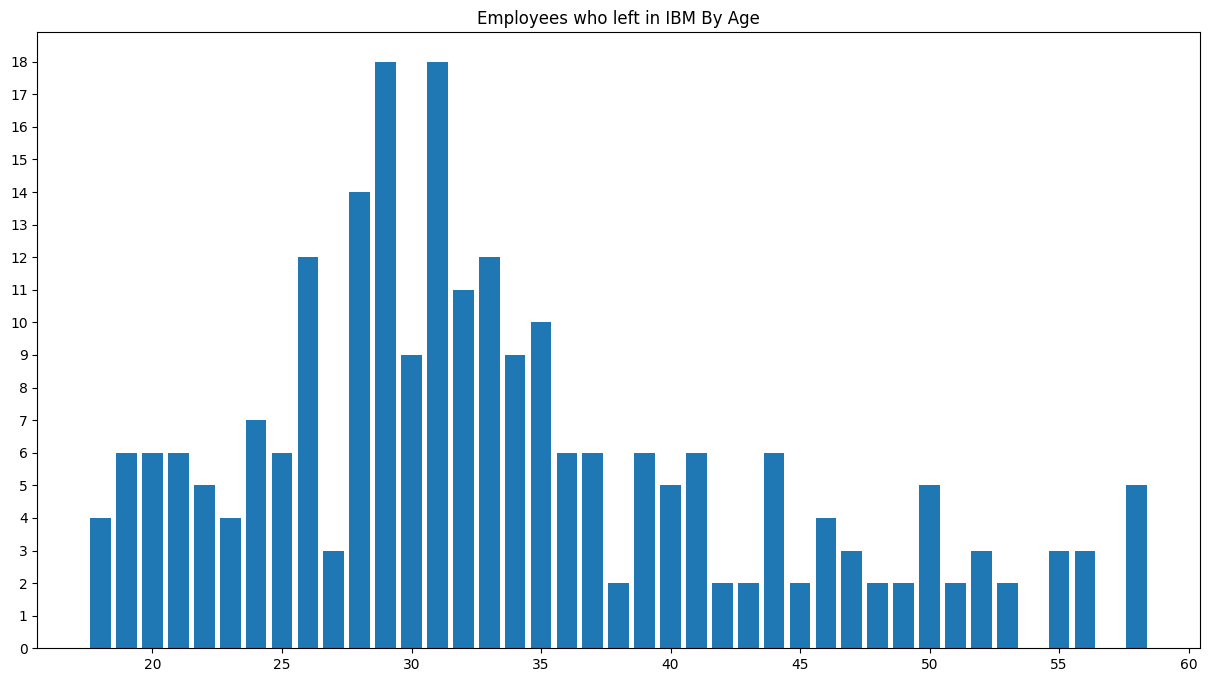

In [139]:
plt.figure(figsize=(15,8))
plt.title('Employees who left in IBM By Age')
plt.bar(attrition_yes_by_age.index, height=attrition_yes_by_age)
plt.yticks(range(0,max(attrition_yes_by_age)+1))
plt.show()

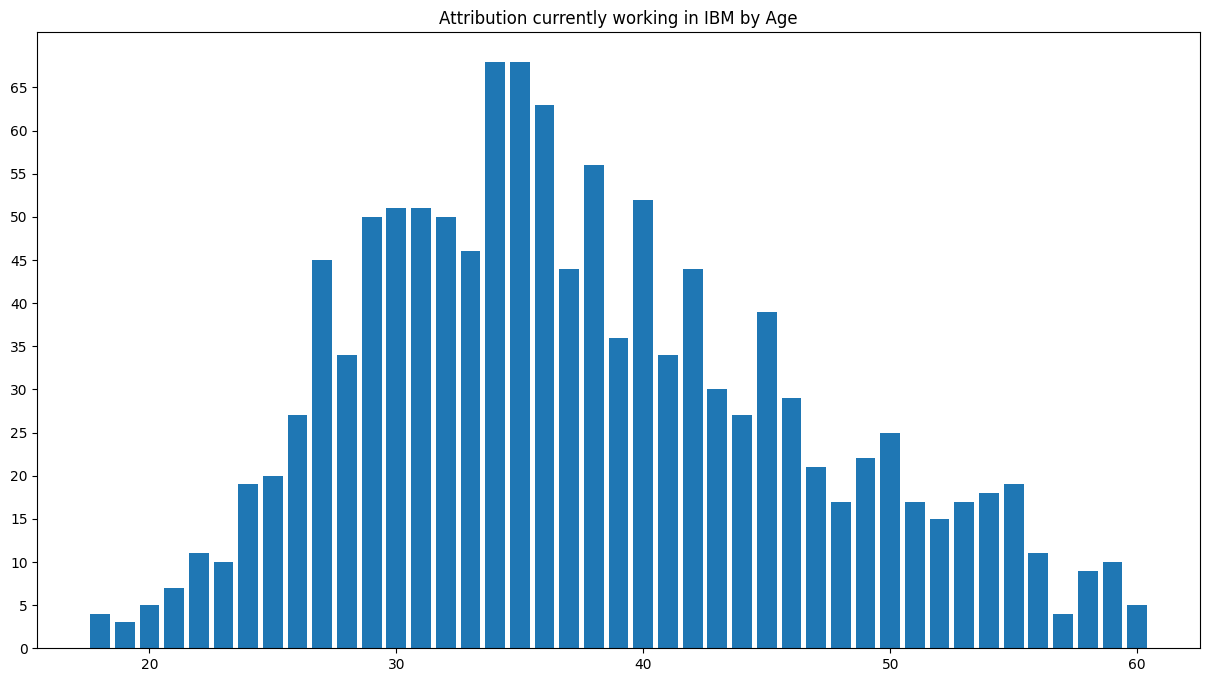

In [140]:
plt.figure(figsize=(15,8))
plt.title('Attribution currently working in IBM by Age')
plt.bar(attrition_no_by_age.index, height=attrition_no_by_age)
plt.yticks(range(0,max(attrition_no_by_age)+1,5))
plt.show()

In [141]:
employees_leaving_percent = pd.Series([attrition_yes_by_age.get(index,default=0)/ages_count.get(index,default=0)*100 for index in range(18,61)],index= range(18,61)) 

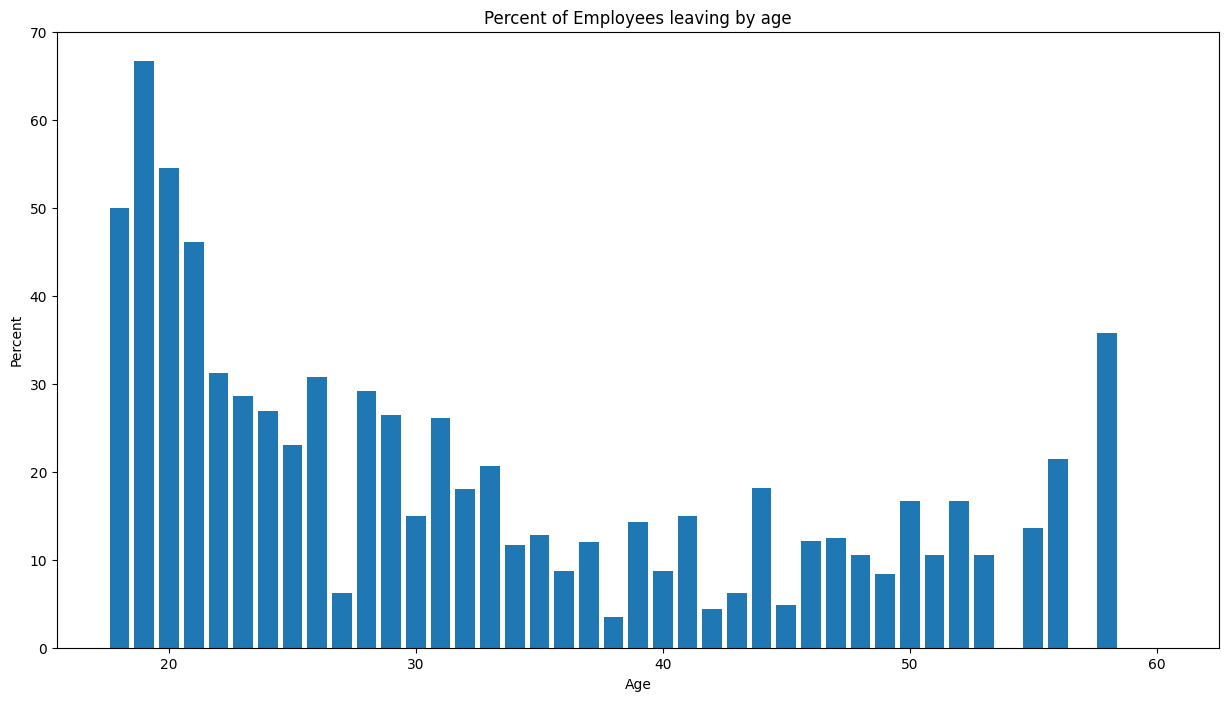

In [142]:
plt.figure(figsize = (15,8))
plt.bar(employees_leaving_percent.index, employees_leaving_percent)
plt.title("Percent of Employees leaving by age")
plt.xlabel("Age")
plt.ylabel('Percent')
plt.show()

In [143]:
employees_leaving_percent

18    50.000000
19    66.666667
20    54.545455
21    46.153846
22    31.250000
23    28.571429
24    26.923077
25    23.076923
26    30.769231
27     6.250000
28    29.166667
29    26.470588
30    15.000000
31    26.086957
32    18.032787
33    20.689655
34    11.688312
35    12.820513
36     8.695652
37    12.000000
38     3.448276
39    14.285714
40     8.771930
41    15.000000
42     4.347826
43     6.250000
44    18.181818
45     4.878049
46    12.121212
47    12.500000
48    10.526316
49     8.333333
50    16.666667
51    10.526316
52    16.666667
53    10.526316
54     0.000000
55    13.636364
56    21.428571
57     0.000000
58    35.714286
59     0.000000
60     0.000000
dtype: float64

In [144]:
age_work_life_balance = data_set[['Age', 'WorkLifeBalance']]

## Explore Explore data of left employees

In [145]:
left_employees_data_set = data_set[data_set["Attrition"] == 'Yes']

In [146]:
left_employees_data_set.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,10.632911,2.839662,2.464135,2.468354,4787.092827,2.940928,2.658228,5.130802
std,9.689350,8.452525,1.008244,1.169791,1.118058,3640.210367,2.678519,0.816453,5.949984
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,2.000000,1.000000,1.000000,2373.000000,1.000000,2.000000,1.000000
50%,32.000000,9.000000,3.000000,3.000000,3.000000,3202.000000,1.000000,3.000000,3.000000
75%,39.000000,17.000000,4.000000,4.000000,3.000000,5916.000000,5.000000,3.000000,7.000000
max,58.000000,29.000000,5.000000,4.000000,4.000000,19859.000000,9.000000,4.000000,40.000000


### Environment Satisfaction of Left Employees

In [147]:
env_satis_of_left_emp = left_employees_data_set.EnvironmentSatisfaction.value_counts()

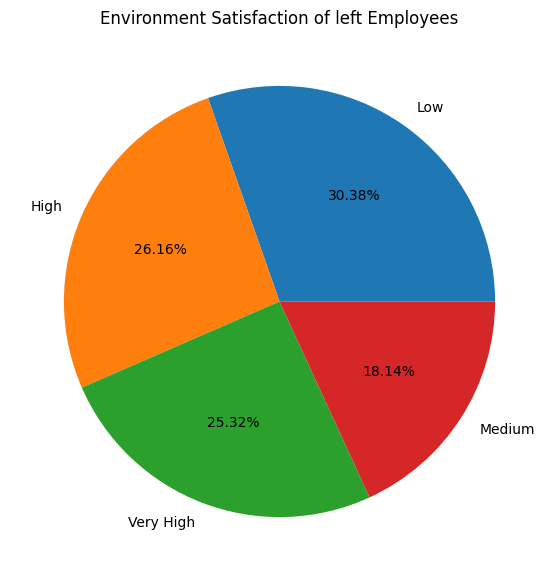

In [148]:
plt.figure(figsize=(7,7))
plt.title('Environment Satisfaction of left Employees')
plt.pie(env_satis_of_left_emp, labels = [satisfaction_labels[index] for index in env_satis_of_left_emp.index.tolist()], autopct='%.2f%%')
plt.show()

In [149]:
job_satis_of_left_emp = left_employees_data_set.JobSatisfaction.value_counts()

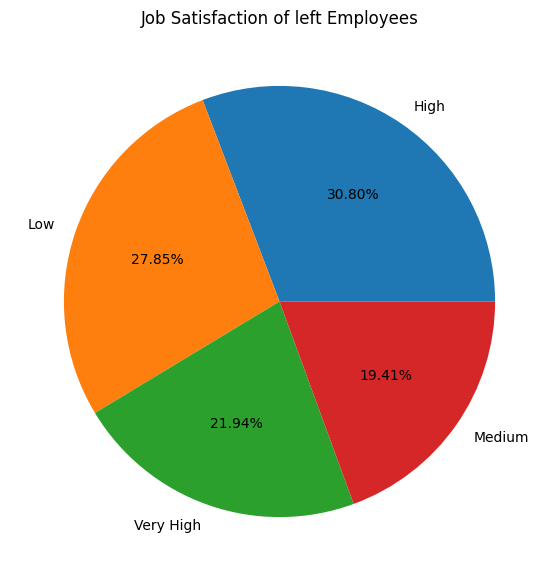

In [150]:
plt.figure(figsize=(7,7))
plt.title('Job Satisfaction of left Employees')
plt.pie(job_satis_of_left_emp, labels = [satisfaction_labels[index] for index in job_satis_of_left_emp.index.tolist()], autopct='%.2f%%')
plt.show()

### Work-Life Balance of Left Employees

In [151]:
work_life_of_left_emp = left_employees_data_set.WorkLifeBalance.value_counts()
work_life_labels = {1: 'Bad',2: 'Good',3: 'Better',4: 'Best'}

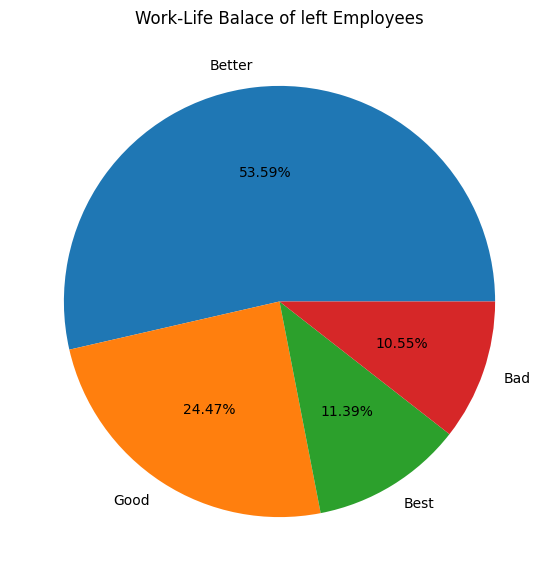

In [152]:
plt.figure(figsize = (7,7))
plt.pie(work_life_of_left_emp, labels = [work_life_labels[index] for index in work_life_of_left_emp.index.tolist()], autopct= '%.2f%%')
plt.title('Work-Life Balace of left Employees')
plt.show()

## Distribution of employees by Education

In [153]:
data_set.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [154]:
education_field = data_set.EducationField.value_counts()
education_field

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

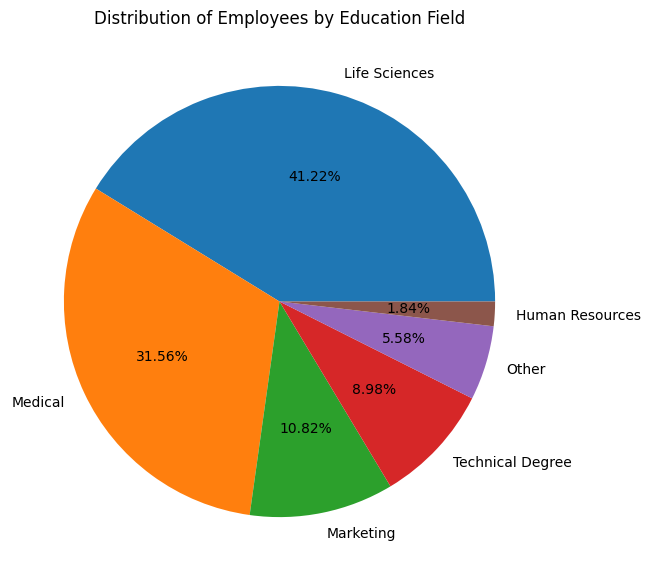

In [155]:
plt.figure(figsize = (7,7))
plt.title('Distribution of Employees by Education Field')
plt.pie(education_field, labels = education_field.index.to_list(),autopct = '%.2f%%')
plt.show()

## Bar Chart of Marital Status of Employees

In [156]:
data_set.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [157]:
marital_status = data_set.MaritalStatus.value_counts()
marital_status

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

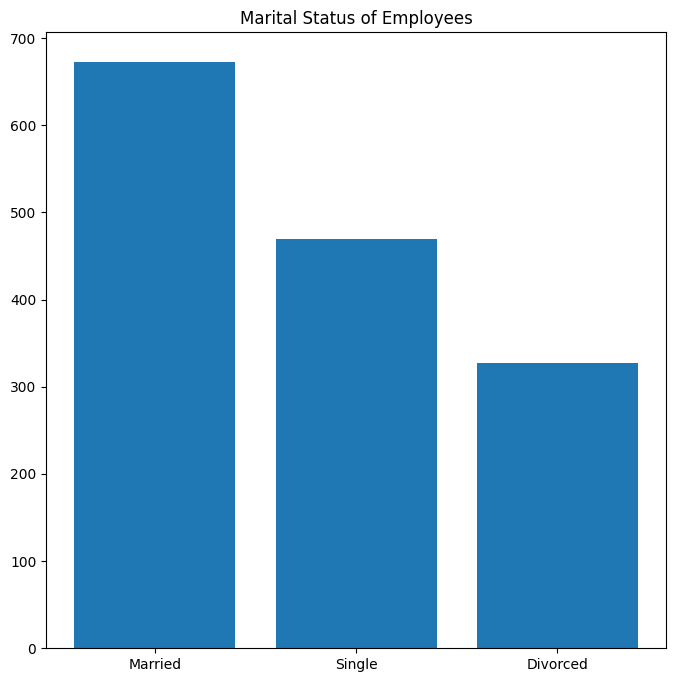

In [158]:
plt.figure(figsize = (8,8))
plt.title("Marital Status of Employees")
plt.bar(marital_status.index, height= marital_status)
plt.show()

# Build Logistic Regression Model

In [159]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


<Axes: >

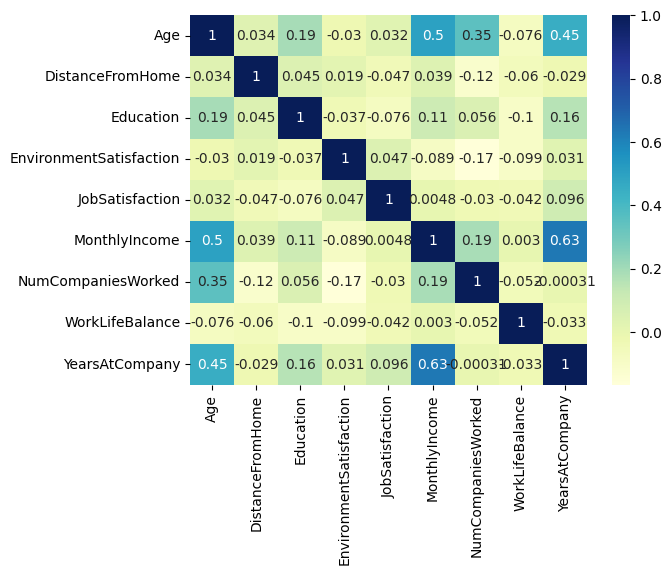

In [160]:
sns.heatmap(left_employees_data_set.corr(numeric_only= True),cmap="YlGnBu",annot= True)

In [161]:
data_set.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [162]:
# converting attriotion column to integer format

def attrition_to_num(attr: str):
    if attr == "Yes":
        return 1
    elif attr == 'No':
        return 0

# modifying required features for regression

In [167]:
data_set_features =data_set.copy()


In [169]:
data_set_features['is_attritioned'] = data_set_features['Attrition'].apply(attrition_to_num)

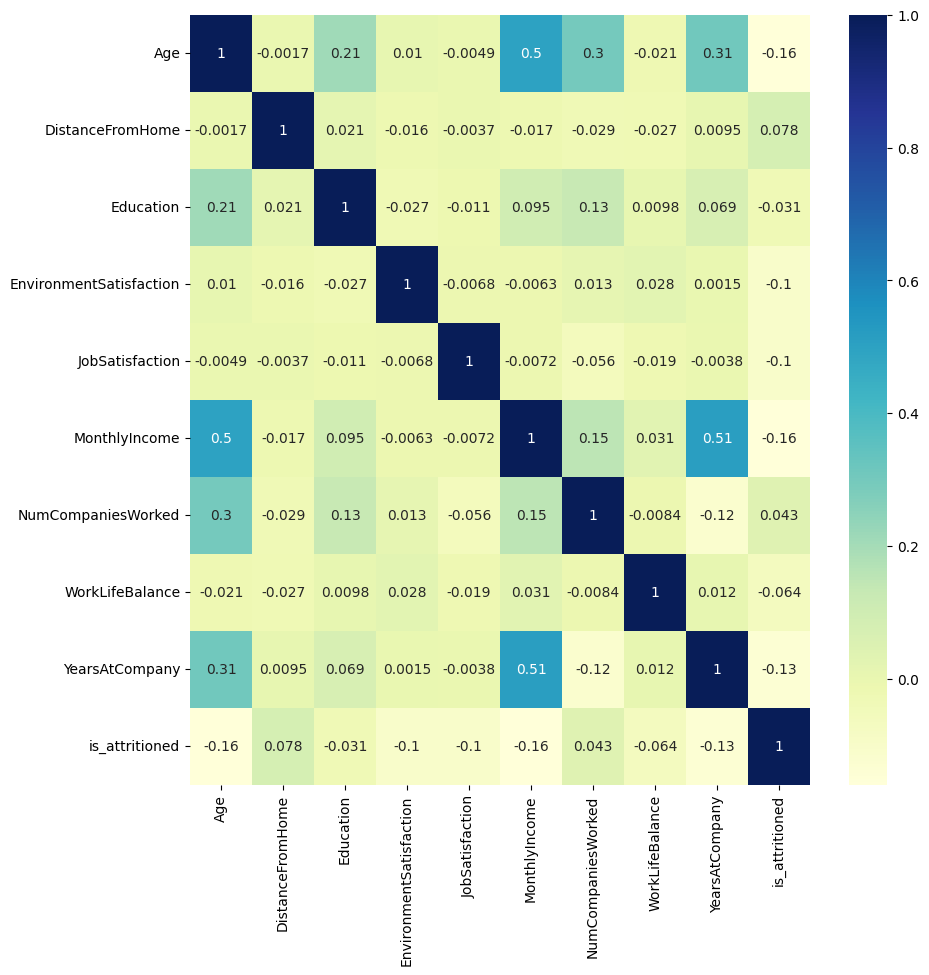

In [170]:
plt.figure(figsize = (10,10))
sns.heatmap(data_set_features.corr(numeric_only= True), cmap = 'YlGnBu', annot = True)
plt.show()

In [171]:
data_set_features.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany', 'is_attritioned'],
      dtype='object')

In [172]:
features = ['Age','EnvironmentSatisfaction','JobSatisfaction','MonthlyIncome','YearsAtCompany']
label = ['is_attritioned']

In [173]:
df = data_set_features.copy()
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,is_attritioned
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,1
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,0
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,1
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,0
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,0


In [174]:
X = df[features]
y = df[label]
X.shape, y.shape

((1470, 5), (1470, 1))

In [220]:
# import sk libraries 
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1102, 5), (368, 5), (1102, 1), (368, 1))

In [222]:
# import linear regression model and standard scaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [223]:
log_reg = LogisticRegression()
std_scaler = StandardScaler()

In [224]:
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [225]:
log_reg.fit(X_train,y_train)

/home/kamalnath/Documents/CB_Tech/Projects/Problems/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [226]:
y_pred = log_reg.predict(X_test)

In [227]:
# import confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [228]:
conf_mtx = confusion_matrix(y_true = y_test, y_pred = y_pred)
conf_mtx

array([[316,   0],
       [ 52,   0]])

In [229]:
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('accuracy score: ', acc*100)

accuracy score:  85.86956521739131
